# Sales Prediction Using Python

### Importing Libraries

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import IPython
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np

### Read Dataset

In [2]:
data=pd.read_csv("Advertising.csv")

### Data Analysis

In [3]:
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 5)

In [6]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Data Visualization

<Axes: xlabel='TV'>

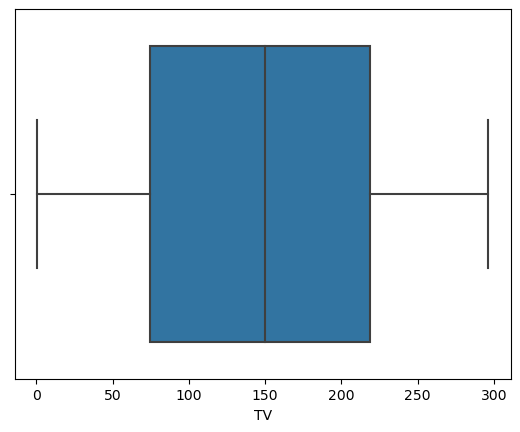

In [9]:
sns.boxplot(x='TV',data=data)

<Axes: xlabel='Radio'>

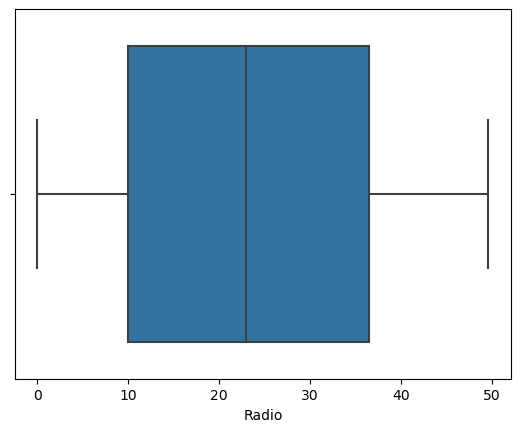

In [10]:
sns.boxplot(x='Radio',data=data)

<Axes: xlabel='Newspaper'>

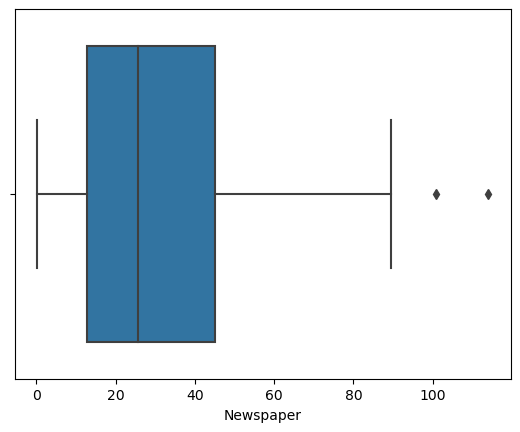

In [11]:
sns.boxplot(x='Newspaper',data=data)

<Axes: xlabel='Unnamed: 0'>

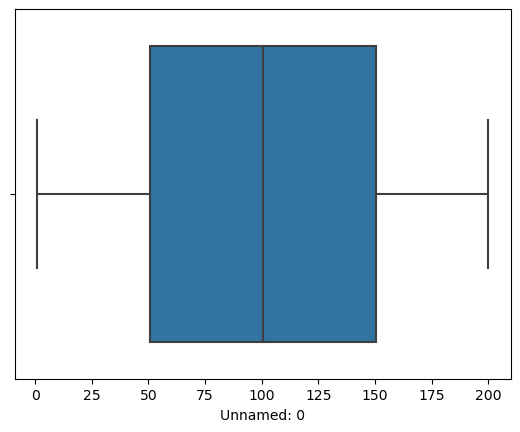

In [12]:
sns.boxplot(x='Unnamed: 0',data=data)

<Axes: xlabel='Sales'>

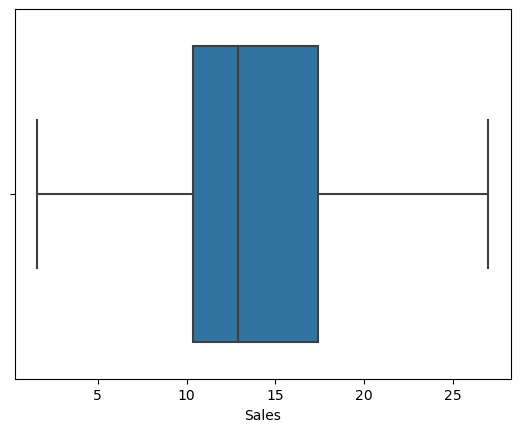

In [13]:
sns.boxplot(x='Sales',data=data)

In [14]:
import random
from IPython.core.display import update_display

In [15]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


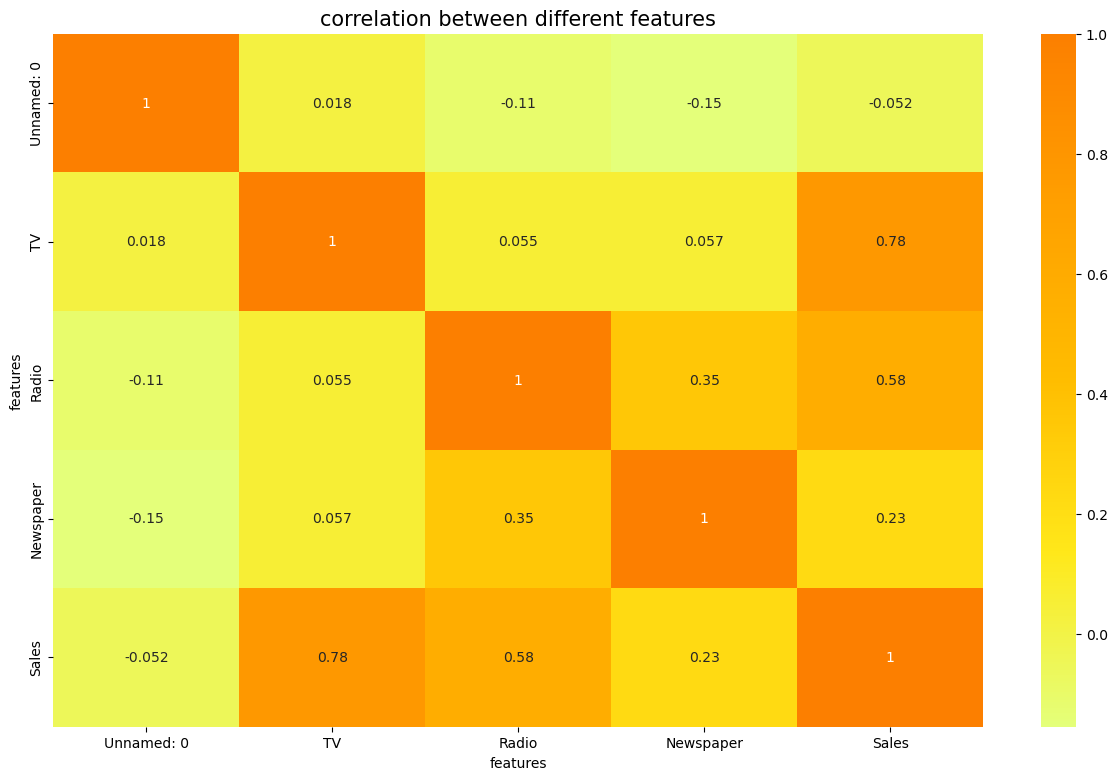

In [16]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('correlation between different features',fontsize=15,c='black')
plt.show()

### Defining X and Y 

In [17]:
#defining X and Y
feature_cols = ['Unnamed: 0','TV','Radio','Newspaper']
X = data[feature_cols]# Features
y = data.Sales # Target variable

### Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

### Importing Model

In [19]:
#Importing Model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Splitting into train and test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

### Building the model

In [21]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [29]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred=Classifier.predict(X_test)

### Evaluating with Model

In [24]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Decision Tree Model accuracy score: 0.0750


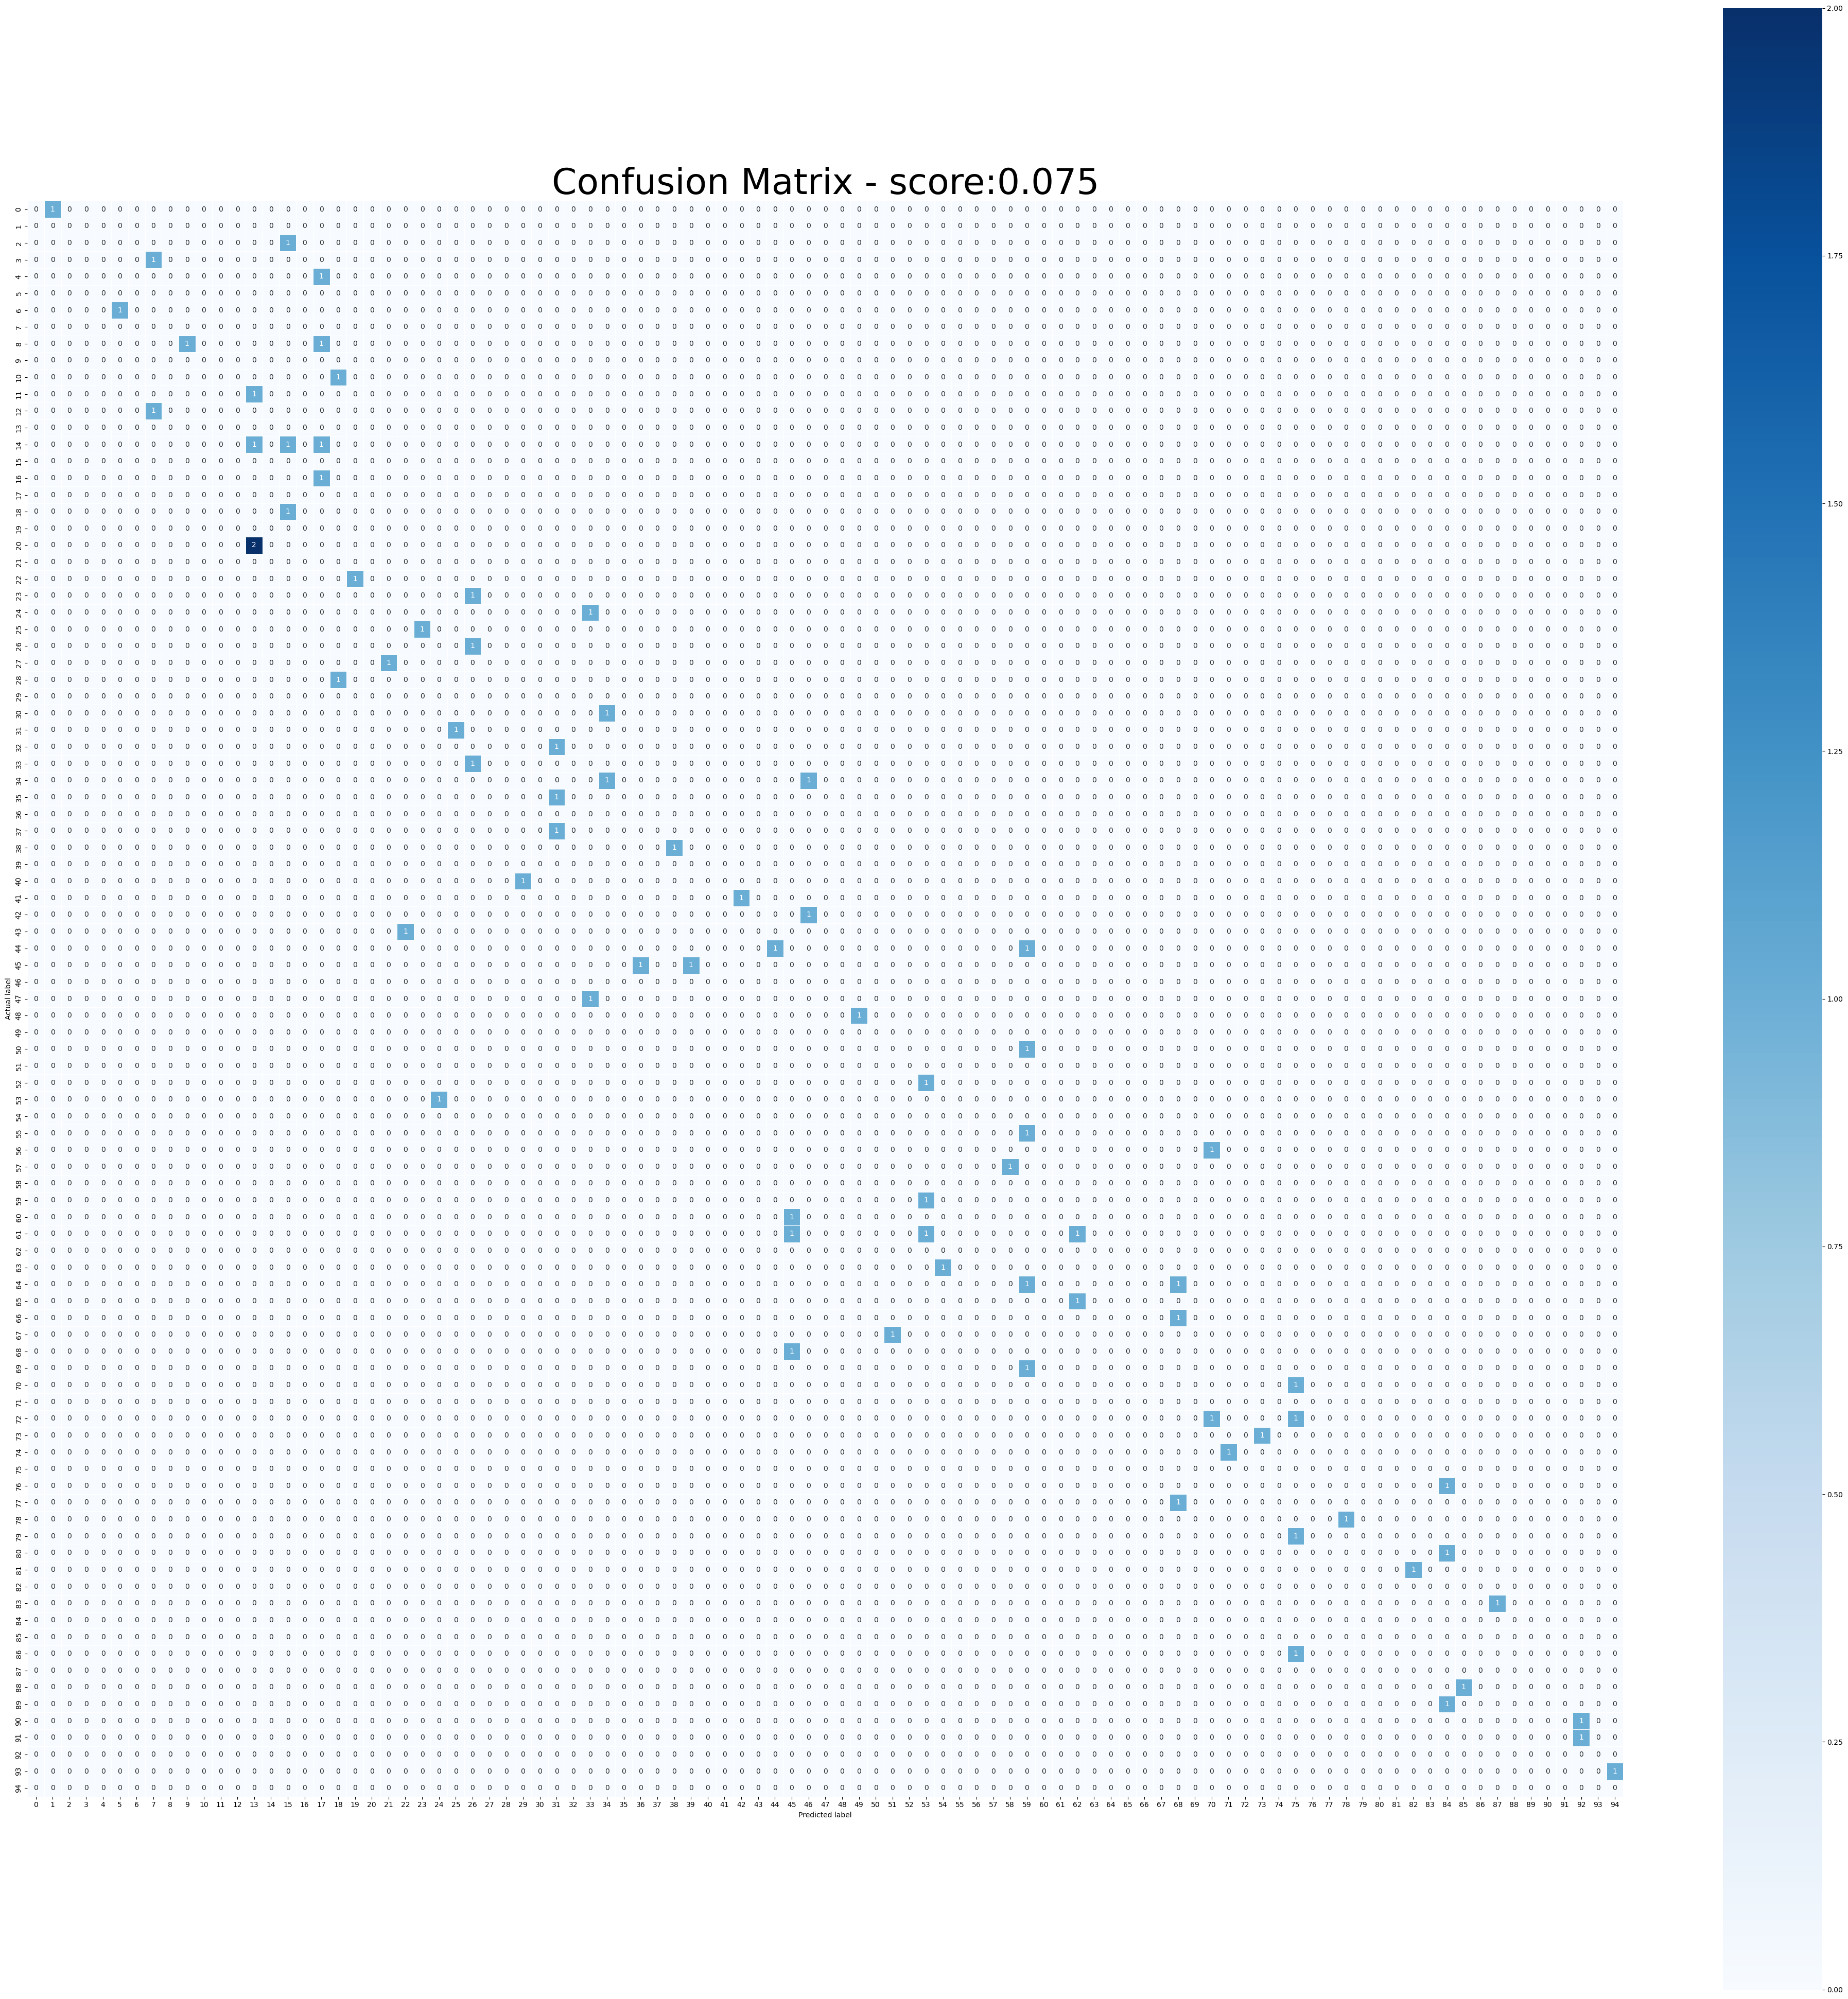

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(50,50))
sns.heatmap(cm,annot=True,fmt=".0f",linewidths=0.5,square=True,cmap='Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Confusion Matrix - score:' +str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title,size=50);
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         3
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00    

### Testing the model 

In [27]:
X_test[0:1]

,Unnamed: 0,TV,Radio,Newspaper
18,19,69.2,20.5,18.3


In [28]:
result=Classifier.predict(X_test[0:1])
result

array([32], dtype=int64)